In [22]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data1 = randn(100)
data2 = randn(100)

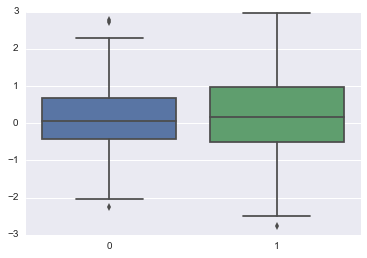

In [26]:
sns.boxplot(data=[data1,data2])

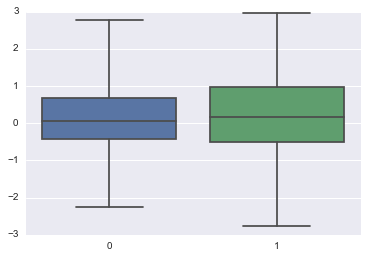

In [27]:
sns.boxplot(data=[data1,data2],whis=np.inf)
#to include the outlier points

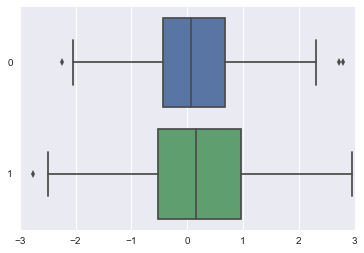

In [30]:
sns.boxplot(data=[data1,data2],vert=False)

In [37]:
#normal distribution
data1 = stats.norm(0,5).rvs(100)

data2 = np.concatenate([stats.gamma(5).rvs(50)-1,-1*stats.gamma(5).rvs(50)-1])

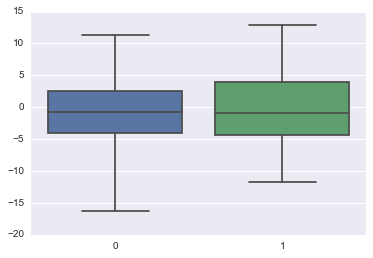

In [33]:
sns.boxplot(data=[data1,data2],whis=np.inf)

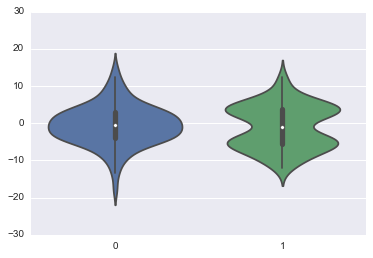

In [38]:
sns.violinplot(data=[data1,data2])

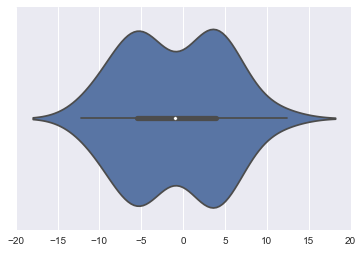

In [41]:
sns.violinplot(data2,bw=0.5)

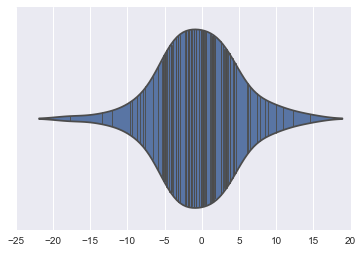

In [45]:
sns.violinplot(data1,inner='stick')

In [46]:
#multiple regression plots



In [57]:
tips = sns.load_dataset('tips')

In [48]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


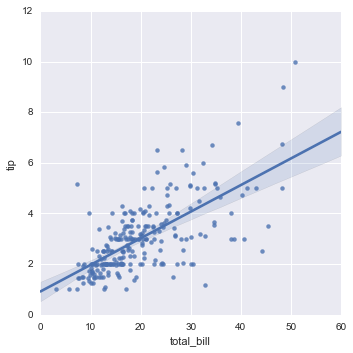

In [49]:
sns.lmplot('total_bill','tip',tips)

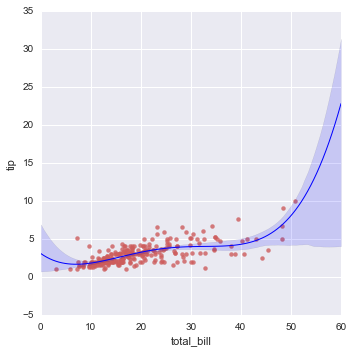

In [53]:
sns.lmplot('total_bill','tip',tips,order=4,scatter_kws={'marker':'o','color':'indianred'},line_kws={'linewidth':1,'color':'blue'})

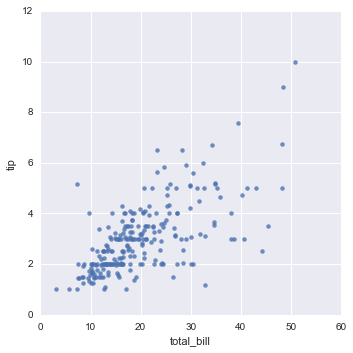

In [54]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [58]:
tips['tips_pct'] = 100*(tips['tip']/tips['total_bill'])

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


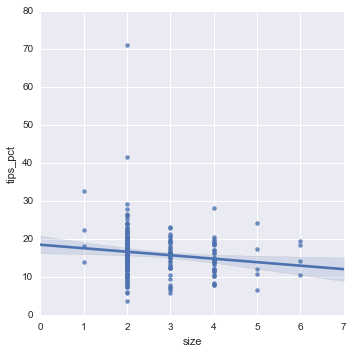

In [61]:
sns.lmplot('size','tips_pct',tips)

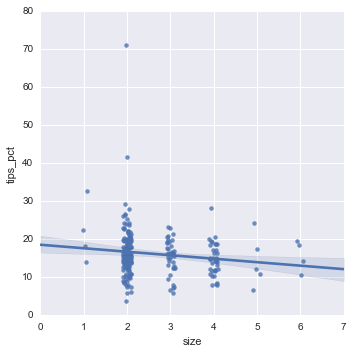

In [62]:
sns.lmplot('size','tips_pct',tips,x_jitter=0.1)

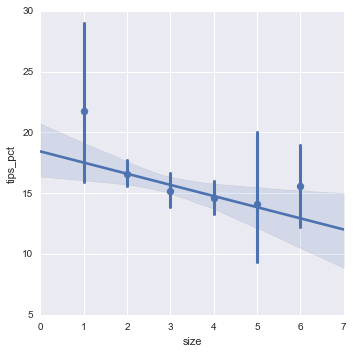

In [63]:
sns.lmplot('size','tips_pct',tips,x_estimator=np.mean)

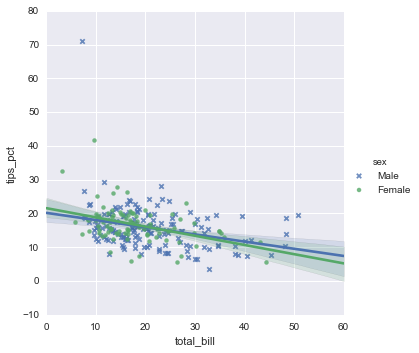

In [64]:
sns.lmplot('total_bill','tips_pct',tips,hue='sex',markers=['x','o'])

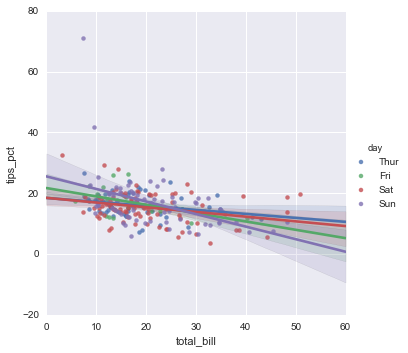

In [65]:
sns.lmplot('total_bill','tips_pct',tips,hue='day')

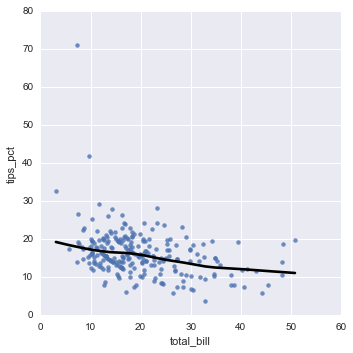

In [66]:
sns.lmplot('total_bill','tips_pct',tips,lowess=True,line_kws={'color':'black'})

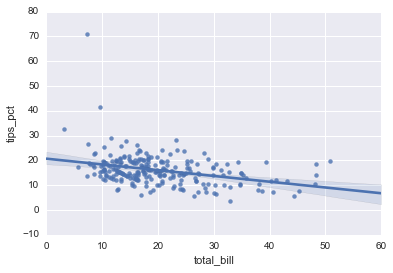

In [67]:
sns.regplot('total_bill','tips_pct',tips)

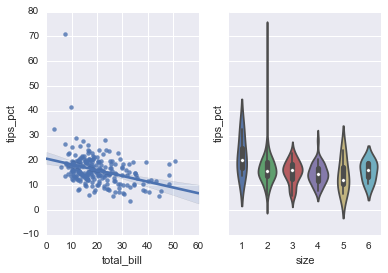

In [77]:
fig,(axis1,axis2) = plt.subplots(1,2,sharey=True)
sns.regplot('total_bill','tips_pct',tips,ax=axis1)
sns.violinplot(tips['size'],tips['tips_pct'] ,ax=axis2)

In [78]:
#heatmaps and clustered matrices





In [81]:
flight_dframe = sns.load_dataset('flights')

In [82]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [84]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [85]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


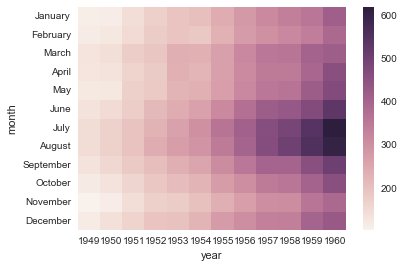

In [87]:
sns.heatmap(flight_dframe)

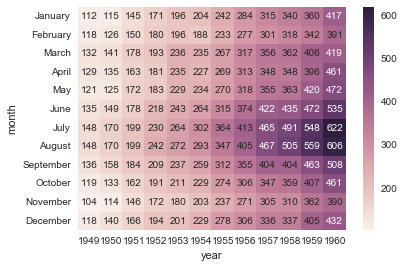

In [91]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

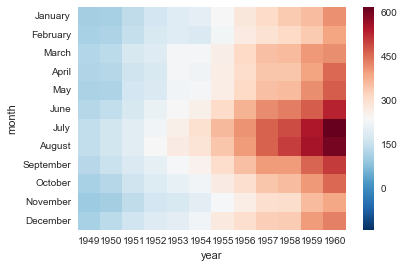

In [94]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])#,annot=True,fmt='d')

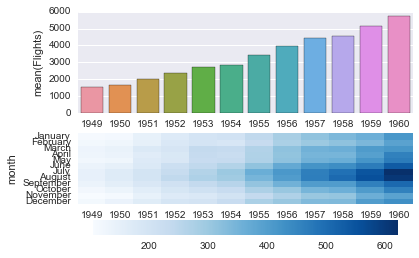

In [104]:
f, (axis1,axis2) = plt.subplots(2,1)
yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax = axis2,cbar_kws = {'orientation':'horizontal'})

In [105]:
#clustermaps




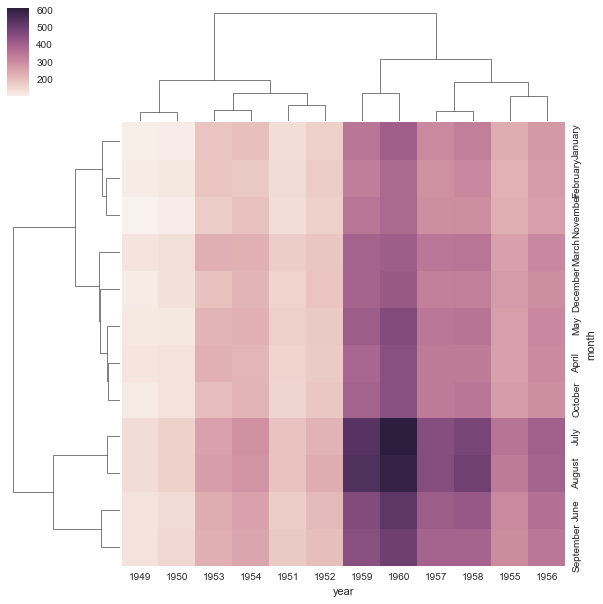

In [108]:
sns.clustermap(flight_dframe)

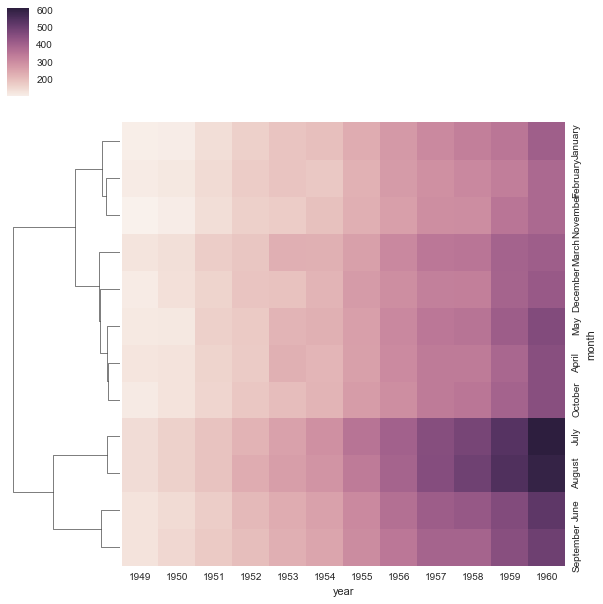

In [109]:
sns.clustermap(flight_dframe,col_cluster=False)

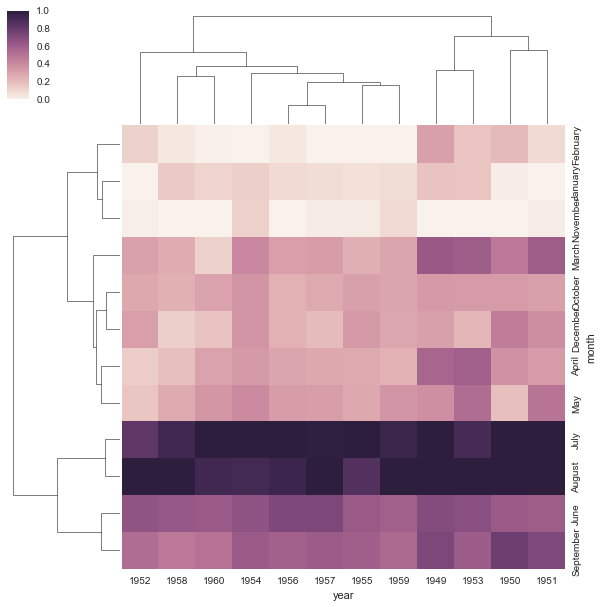

In [110]:
sns.clustermap(flight_dframe, standard_scale=1)

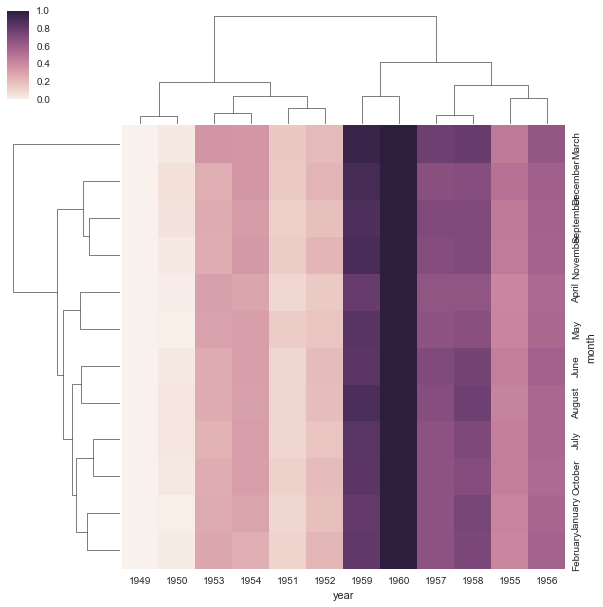

In [111]:
sns.clustermap(flight_dframe,standard_scale=0)

In [ ]:
sns.clustermap(flight_dframe,zscore)